In [123]:
import wave
import array
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Audio
%matplotlib inline

## sine wave

In [124]:
def gen_sine(f):
    duration = 1
    y = np.sin(f * 2 * np.pi * np.linspace(0, duration, 44100 * duration))  # * np.linspace(0, 1, 44100 * duration)
    return y

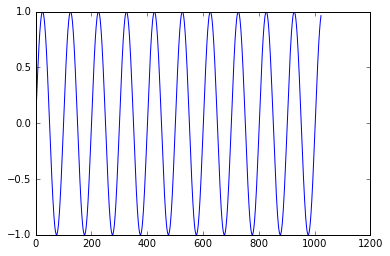

In [125]:
y = gen_sine(440)
plt.plot(y[:1024])
display(Audio(y, rate=44100))

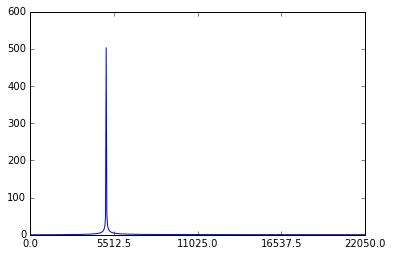

(158.872339035+477.221577622j) (-18.3956339461-54.6382958635j) 502.972021347 0.03125859146


In [126]:
y = gen_sine(5000)
D = np.fft.fft(y[:1024])
plt.plot(np.abs(D))
plt.xlim(0, 1024 / 2)
plt.xticks(np.linspace(0, 1024 / 2, 5), np.linspace(0, 44100 / 2, 5))
plt.show()

print(D.max(), D.min(), np.abs(D).max(), np.abs(D).min())

## sawtooth wave

In [127]:
def gen_saw(f):
    duration = 1
    y = - 1 + 2 * (np.linspace(0, 44100, 44100) % (44100 / f)) / (44100 / f)
    return y

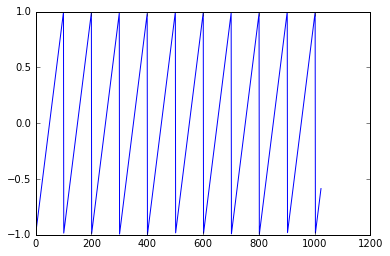

In [128]:
y = gen_saw(440)
plt.plot(y[:1024])
display(Audio(y, rate=44100))

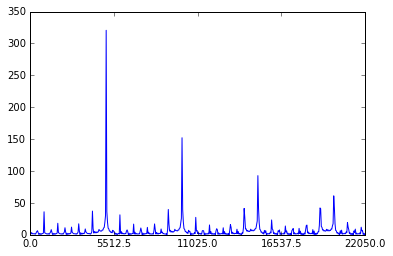

(42.1225791385-1.49116985071j) (-102.436078135-303.866368096j) 320.667927557 0.145644865214


In [129]:
y = gen_saw(5000)
D = np.fft.fft(y[:1024])
plt.plot(np.abs(D))
plt.xlim(0, 1024 / 2)
plt.xticks(np.linspace(0, 1024 / 2, 5), np.linspace(0, 44100 / 2, 5))
plt.show()

print(D.max(), D.min(), np.abs(D).max(), np.abs(D).min())

### Generate white noise

In [176]:
def gen_noise():
    duration = 1
    return np.random.normal(0, 1, duration * 44100)

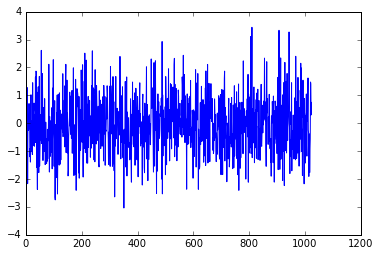

In [177]:
y = gen_noise()
plt.plot(y[:1024])
display(Audio(y, rate=44100))

## Generate and write wave file

### sine doremi

In [171]:
ddoremi = np.concatenate([gen_sine(440 * (2 ** ((3 + i) /12))) for i in (0, 2, 4, 5, 7, 9, 11, 12)])
display(Audio(ddoremi, rate=44100))

fdoremi = wave.open('data/doremi.wav', 'wb')
fdoremi.setnchannels(2)
fdoremi.setsampwidth(2)
fdoremi.setframerate(44100)

fdoremi.writeframes(array.array('i', (ddoremi * 32767).astype(int)).tostring())
fdoremi.close()

### sine doremi with noise

In [168]:
ddoremi = np.concatenate([gen_sine(440 * (2 ** ((3 + i) /12))) for i in (0, 2, 4, 5, 7, 9, 11, 12)])
noise = gen_noise()
noise_drums_duration = 0.1
for i in range(8):
    ddoremi[44100 * i + 1:44100 * i + 1 + int(44100 * noise_drums_duration)] += noise[0:int(44100 * noise_drums_duration)]

display(Audio(ddoremi, rate=44100))

fdoremi = wave.open('data/doremi-with-noise.wav', 'wb')
fdoremi.setnchannels(2)
fdoremi.setsampwidth(2)
fdoremi.setframerate(44100)

fdoremi.writeframes(array.array('i', (ddoremi * 32767).astype(int)).tostring())
fdoremi.close()